First, read csv as a pandas dateframe. then cleaning data.

In [14]:
from scipy import stats
import seaborn as sns
import numpy as np
import pandas as pd

data = pd.read_csv('Advertising.csv')
data = data.dropna()

In order to find out outlier values, calculate z-score.

In [31]:
tv_zscore = stats.zscore(data['TV'])
radio_zscore = stats.zscore(data['Radio'])
newspaper_zscore = stats.zscore(data['Newspaper'])

print('', 'Min', '\tMax', sep='\t\t')
print('TV\t', tv_zscore.min(), tv_zscore.max(), sep='\t')
print('Radio\t', radio_zscore.min(), radio_zscore.max(), sep='\t')
print('Newspaper', newspaper_zscore.min(), newspaper_zscore.max(), sep='\t')

		Min			Max
TV		-1.7088234692862663	1.744029255437918
Radio		-1.5708681061368763	1.778300483288375
Newspaper	-1.3926464877239573	3.8411707150992718


Newspaper seems to have outlier values, then remove outlier values from data.  
`Remove rows which is zcore is greater than 3.`

In [32]:
newspaper_data = data[(np.abs(newspaper_zscore)) < 3]

Newspaper	-1.4453465435874193	2.923455761331717


Now, I can run person test.

In [34]:
tv_r, _ = stats.pearsonr(data['TV'], data['Sales'])
radio_r, _ = stats.pearsonr(data['Radio'], data['Sales'])
newspaper_r_with, _ = stats.pearsonr(data['Newspaper'], data['Sales'])
newspaper_r_without, _ = stats.pearsonr(newspaper_data['Newspaper'], newspaper_data['Sales'])

print(f'TV: {tv_r}')
print(f'Radio: {radio_r}')
print(f'Newspaper with outlier: {newspaper_r_with}')
print(f'Newspaper without outlier: {newspaper_r_without}')

TV: 0.7822244248616066
Radio: 0.5762225745710554
Newspaper with outlier: 0.22829902637616534
Newspaper without outlier: 0.21955467558031128


TV has a storongest correlations.
Then visualize correlations with scatterplot.

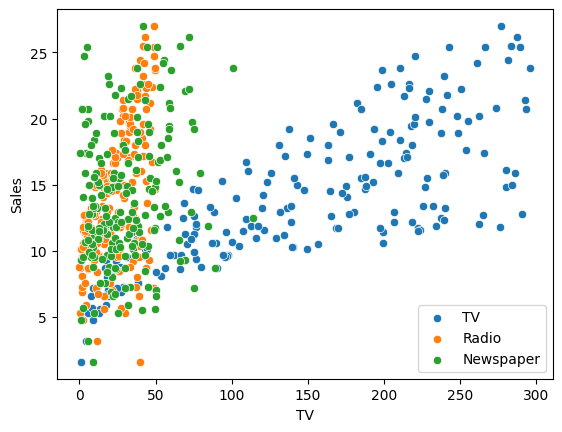

In [18]:
scatterplot = sns.scatterplot(x='TV', y='Sales', data=data)
scatterplot = sns.scatterplot(x='Radio', y='Sales', data=data)
scatterplot = sns.scatterplot(x='Newspaper', y='Sales', data=data)

scatterplot.legend(['TV', 'Radio', 'Newspaper'])

## Conclusion

We can figure out that they have correlations with some chart or graph. But that way is not quantitative. We can say they seem to have correlations, but we cannot say how much they have correlations.  
But this time, we learned pearson test. This way you can express how much they have correlations as a number Then we can compare numbers in order to find out which way is most efficient or not.  
But I realized that we have to be careful with outlier values. When using graph or plot, our brain unconsciously ignores outlier plot. But when using Pearson test, it warps up numbers into one number(r). It means number is calculated by outlier values as well. Before running test, it is must to remove outlier.